# Homework 3 #2: Implement EM algorithm

## Part A: Parse and Plot datapoints

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [315]:
data = np.loadtxt("faithful.txt")
df = pd.DataFrame(data=data, columns=["index", "eruptions", "waiting"])
df = df.drop("index", axis=1)
df

,eruptions,waiting
0,3.600,79.0
1,1.800,54.0
2,3.333,74.0
3,2.283,62.0
4,4.533,85.0
...,...,...
267,4.117,81.0
268,2.150,46.0
269,4.417,90.0
270,1.817,46.0


In [345]:
X = df.to_numpy()[:,:2]
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

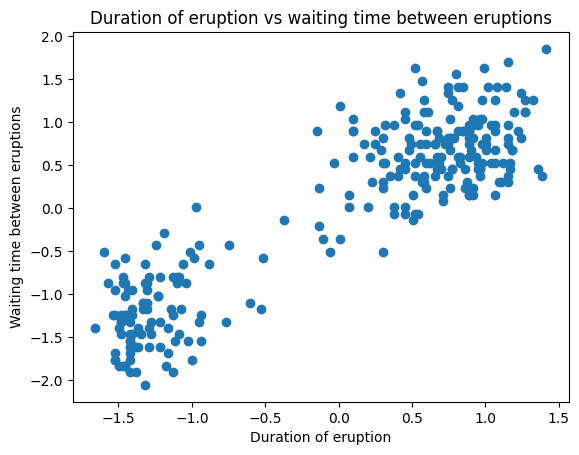

In [347]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Duration of eruption')
plt.ylabel('Waiting time between eruptions')
plt.title('Duration of eruption vs waiting time between eruptions')
plt.show()

## Part B: Expression for $P_{θ_t}(z=k\mid x)$ in E-step

$P_{θ_t}(z=k\mid x) = \cfrac{P_{θ_t}(z=k, x)}{P_{θ_t}(x)} = \cfrac{P_{θ_t}(x\mid z=k)P_{θ_t}(z=k)}{\sum_{l=1}^K P_{θ_t}(x\mid z=l)P_{θ_t}(z=l)}$ 

## Part C: Formula for $\mu_k, \sum_k$ and $\phi$ in M-step


$\mu_k=\cfrac{\sum_{i=1}^n P(z=k\mid x^{(i)})x^{(i)}}{n_k}$

$\sum_k=\cfrac{\sum_{i=1}^n P(z=k\mid x^{(i)})(x^{(i)}-\mu_k)(x^{(i)}-\mu_k)^\intercal}{n_k}$

$\phi_k=\cfrac{n_k}{n}$

## Part D: Implement and run EM algorithm


In [324]:
def e_step(X, mus, sigmas, phis):
    k1_posteriors = np.zeros([n])
    k2_posteriors = np.zeros([n])
    for i in range(n):
        pxk1 = multivariate_normal(mus[0], sigmas[0]).pdf(X[i]) * phis[0]
        pxk2 = multivariate_normal(mus[1], sigmas[1]).pdf(X[i]) * phis[1]
        sum_k = pxk1 + pxk2
        k1_posteriors[i] = pxk1/sum_k
        k2_posteriors[i] = pxk2/sum_k
    return k1_posteriors, k2_posteriors

In [318]:
def get_mus(posteriors, X, n, d, nk):
    sum_n = np.zeros([d])
    for i in range(n):
        sum_n += posteriors[i] * X[i]
    return sum_n/nk

In [319]:
def get_sigmas(posteriors, d, nk, mus):
    sum_n = np.zeros([d])
    sum_n2 = np.zeros([d])

    for i in range(n):
        sum_n += posteriors[i] * (X[i] - mus).dot((X[i] - mus).T)
    return sum_n/nk

In [320]:
def m_step(k1_posteriors, k2_posteriors, X, K, n, d):
    nk1 = sum(k1_posteriors)
    nk2 = sum(k2_posteriors)
    
    mus = np.zeros([K, d])
    sigmas = np.zeros([K, d])
    phis = np.zeros([K])
    
    mus[0] = get_mus(k1_posteriors, X, n, d, nk1)
    mus[1] = get_mus(k2_posteriors, X, n, d, nk2)
    
    sigmas[0] = get_sigmas(k1_posteriors, d, nk1, mus[0])
    sigmas[1] = get_sigmas(k2_posteriors, d, nk2, mus[1])

    phis[0] = nk1/n
    phis[1] = nk2/n
    
    return mus, sigmas, phis

In [412]:
from sklearn import preprocessing
from scipy.stats import multivariate_normal
import seaborn as sns


d = 2 # number of features
K = 2 # number of clases
n = X.shape[0] # size of the dataset

np.random.seed(0)
mus = np.random.random([K, d])
sigmas = np.random.random([K, d])
phis = np.random.random([K])

mu1s = []
mu2s = []

mu1s.append(mus[0])
mu2s.append(mus[1])


# If mu is the same for 10 consecutive iterations, terminate EM
count = 0
while (count < 10):
    posteriors = e_step(X, mus, sigmas, phis)
    mus, sigmas, phis = m_step(posteriors[0], posteriors[1], X, K, n, d)
    if np.array_equal(mus[0], mu1s[-1]) and np.array_equal(mus[1], mu2s[-1]):
        count += 1
    else:
        count = 0
    mu1s.append(mus[0])
    mu2s.append(mus[1])

print("Converged after", len(mu1s), "iterations")

Converged after 67 iterations


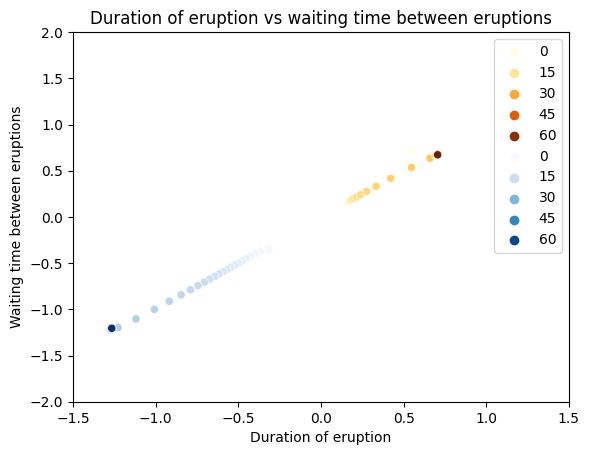

In [411]:
# plt.scatter(np.asarray(mu1s)[:, 0], np.asarray(mu1s)[:, 1])
# plt.scatter(np.asarray(mu2s)[:, 0], np.asarray(mu2s)[:, 1])
sns.scatterplot(x = np.asarray(mu1s)[:, 0], y = np.asarray(mu1s)[:, 1], 
                hue = [i for i in range(len(mu1s))], palette='YlOrBr')
# plt.xlim([-1.5,1.5])
# plt.ylim([-2,2])
# plt.show()

sns.scatterplot(x = np.asarray(mu2s)[:, 0], y = np.asarray(mu2s)[:, 1], 
                hue = [i for i in range(len(mu2s))], palette='Blues')
plt.xlim([-1.5,1.5])
plt.ylim([-2,2])
plt.xlabel('Duration of eruption')
plt.ylabel('Waiting time between eruptions')
plt.title('Duration of eruption vs waiting time between eruptions')
plt.show()